<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2024/blob/main/MLP_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Step 1: Generate and prepare the dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize parameters
np.random.seed(42)
input_size = 2
hidden_size = 3
output_size = 1

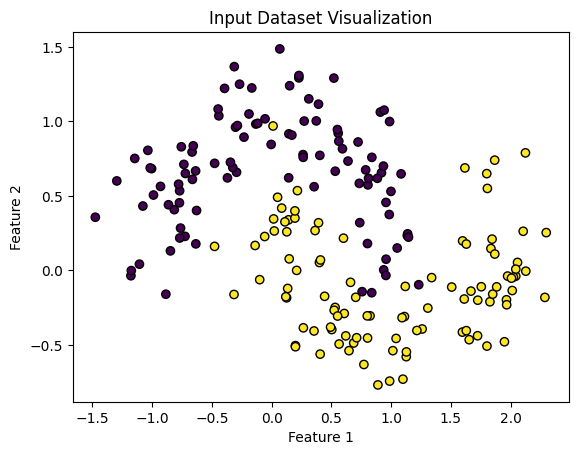

In [ ]:
# Visualize the input dataset
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Input Dataset Visualization')
plt.show()

In [ ]:
# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [ ]:
# Step 3: Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

In [ ]:
# Step 4: Forward propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [ ]:
# Step 5: Backward propagation
def backward_propagation(X, y, Z1, A1, A2, learning_rate=0.01):
    global W1, b1, W2, b2
    m = X.shape[0]

    # Calculate loss gradient for output layer
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Calculate loss gradient for hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights and biases

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

In [ ]:
# Step 6: Training the network
epochs = 10000
learning_rate = 0.01
loss_history = []

for i in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    loss = np.mean((A2 - y_train) ** 2)  # Mean Squared Error
    loss_history.append(loss)

    backward_propagation(X_train, y_train, Z1, A1, A2, learning_rate)

    if i % 1000 == 0:
        print(f'Epoch {i}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.3361
Epoch 1000, Loss: 0.2403
Epoch 2000, Loss: 0.2048
Epoch 3000, Loss: 0.1701
Epoch 4000, Loss: 0.1437
Epoch 5000, Loss: 0.1275
Epoch 6000, Loss: 0.1181
Epoch 7000, Loss: 0.1125
Epoch 8000, Loss: 0.1090
Epoch 9000, Loss: 0.1067


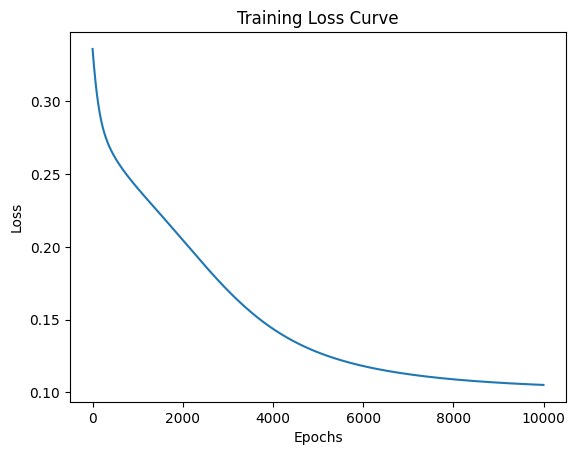

Test Set Accuracy: 85.00%


In [ ]:
# Step 7: Plot the training loss curve
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Step 8: Evaluate the model on the test set
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f'Test Set Accuracy: {accuracy * 100:.2f}%')

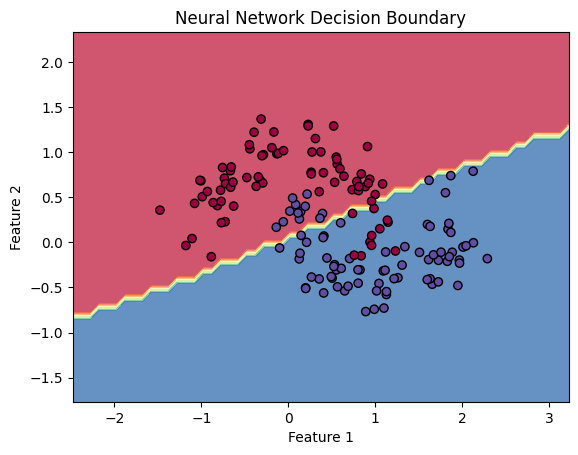

In [ ]:
# Step 9: Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a grid of points to cover the input space
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Use the model to predict on the grid of points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, Z = forward_propagation(grid_points)
    predictions = (Z > 0.5).astype(int)
    Z = predictions.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary')
    plt.show()

# Plotting the decision boundary for the training data
plot_decision_boundary(X_train, y_train, forward_propagation)
